**LOAD** **MODULES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Prepare/collect data**

In [ ]:
import os
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [ ]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

**Visualize data**

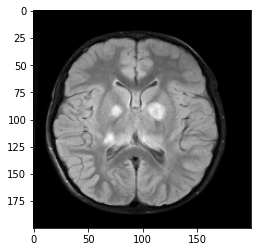

In [ ]:
plt.imshow(X[0], cmap='gray')

**Prepare data**

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

**Split data**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

**Feature Scaling**

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


**Feature Selection: PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [ ]:

# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

**Train Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:

import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [ ]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

**Evaluation**

In [ ]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9510204081632653


In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9907881269191402
Testing Score: 0.9591836734693877


**Prediction**

In [ ]:
pred = sv.predict(xtest)

In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  2,  35,  51,  53,  65, 108, 158, 165, 196, 241]),)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  10
1 1


**Test Model**

In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

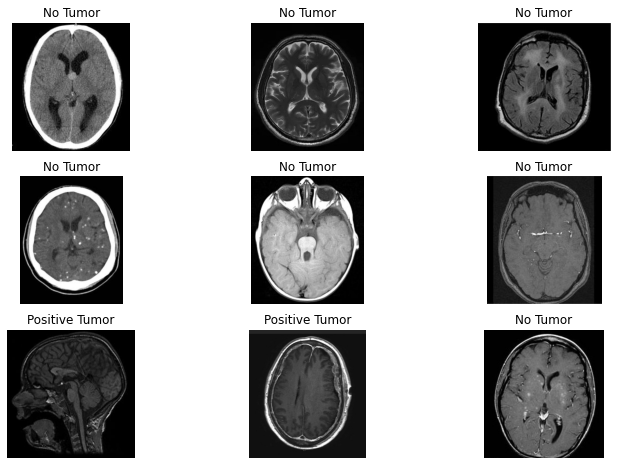

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Testing')
c=1
for i in os.listdir('/content/drive/MyDrive/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('/content/drive/MyDrive/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

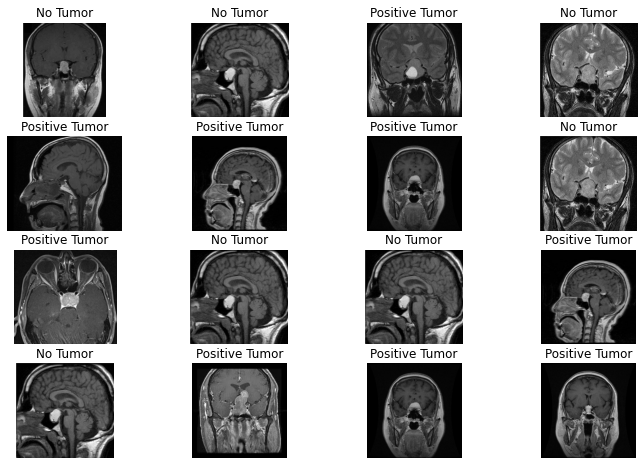

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/content/drive/MyDrive/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
import  pickle
pickle.dump(sv, open('/content/drive/MyDrive/model.pkl','wb'))


In [ ]:
model=pickle.load(open('/content/drive/MyDrive/model.pkl','rb'))


In [ ]:
model.score(xtest,ytest)

0.9591836734693877

In [ ]:
from sklearn.metrics import  classification_report
print(classification_report(ytest,model.predict(xtest)))
print(accuracy_score(ytest,model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        81
           1       0.96      0.98      0.97       164

    accuracy                           0.96       245
   macro avg       0.96      0.95      0.95       245
weighted avg       0.96      0.96      0.96       245

0.9591836734693877
